# Making networkx graphs from source-target DataFrames

### Imports/setup

Let's just get all of this out of the way up top.

In [1]:
%matplotlib inline

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

## Let's deal with our data!

### First, read it in as a normal dataframe

In [4]:
datasets = ['cit-Patents_1092_919138',
            'cit-Patents_7315_1037462', 'cit-Patents_103101_508033']

df = pd.read_csv(f'./Dataset/{datasets[0]}.txt', header=None)

# df = pd.read_csv("clubs.csv")
df.columns=['name','club']
df['name'] = df['name'].astype(str)
df['club'] = df['club'].astype(str)
df.head()

,name,club
0,5735892,3868956
1,4906244,5476476
2,5800508,5415664
3,5934284,5160341
4,4911163,5180367


### Convert it to a graph

Each row is an **edge** with a **source** and a **target**. The network will automatically create nodes for you based on their names.

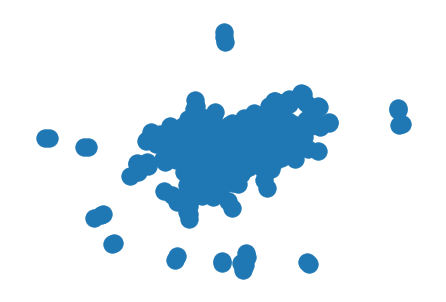

In [6]:
g = nx.from_pandas_edgelist(df, source='name', target='club') 
nx.draw(g)

Horrifying. What if I wanted to build one **where I highlighted the clubs?**

## Let's build a nice visualization

It's going to take a little work and a few list comprehensions, but we'll be okay!

In [7]:
# Make a list of the clubs, we'll use it later
clubs = list(df.club.unique())
clubs

['3868956',
 '5476476',
 '5415664',
 '5160341',
 '5180367',
 '4776337',
 '4878906',
 '5344426',
 '5961490',
 '5759170',
 '5916234',
 '5536250',
 '5480423',
 '4689041',
 '5409495',
 '5397307',
 '4236470',
 '5609574',
 '5195971',
 '5707388',
 '5810757',
 '5232445',
 '5286254',
 '5993482',
 '4641653',
 '5205822',
 '5662700',
 '5674229',
 '5749851',
 '5181911',
 '4651738',
 '5487730',
 '5776180',
 '5133732',
 '5980530',
 '5871488',
 '5935149',
 '5637113',
 '4572186',
 '5147385',
 '5632771',
 '5591197',
 '5192307',
 '5026377',
 '5207695',
 '5370616',
 '5720724',
 '4493323',
 '5575800',
 '4527549',
 '5275622',
 '4763653',
 '5549663',
 '5158545',
 '4693243',
 '5554119',
 '5324260',
 '4650466',
 '5792094',
 '4913141',
 '4195637',
 '5971973',
 '5425711',
 '5733303',
 '3889685',
 '5344402',
 '5507768',
 '5019090',
 '5741293',
 '5061273',
 '6004332',
 '5948018',
 '5649952',
 '4445892',
 '5443495',
 '5984964',
 '5797877',
 '4850969',
 '5019041',
 '5484411',
 '5628788',
 '5997505',
 '5599301',
 '42

In [8]:
# Make a list of the people, we'll use it later
people = list(df.name.unique())
people

['5735892',
 '4906244',
 '5800508',
 '5934284',
 '4911163',
 '6004348',
 '5147370',
 '5707387',
 '5378237',
 '5275622',
 '5089006',
 '5226888',
 '5860998',
 '5423745',
 '5133732',
 '5749915',
 '5674229',
 '4988356',
 '5290305',
 '5451207',
 '4573966',
 '4338942',
 '5591228',
 '5836951',
 '3766924',
 '4503569',
 '3349772',
 '4923464',
 '5433706',
 '4781192',
 '5158545',
 '4425908',
 '5630829',
 '5116318',
 '5059201',
 '4493323',
 '4723549',
 '4846174',
 '5674287',
 '4655771',
 '5879370',
 '5609574',
 '5984964',
 '5824057',
 '4994032',
 '5728112',
 '4795458',
 '4602635',
 '4276874',
 '4830003',
 '5501667',
 '4913141',
 '4650466',
 '4994033',
 '4762129',
 '4689041',
 '4577631',
 '4787899',
 '5421826',
 '5312344',
 '5061273',
 '5911732',
 '5382261',
 '5980530',
 '5683451',
 '5181911',
 '5725547',
 '2936760',
 '5540704',
 '4130904',
 '5059211',
 '4739762',
 '4699611',
 '5536250',
 '5472424',
 '5108370',
 '4459252',
 '5176619',
 '5021046',
 '4771777',
 '4990151',
 '5567203',
 '5380282',
 '53

In [9]:
dict(zip(clubs, clubs))

{'3868956': '3868956',
 '5476476': '5476476',
 '5415664': '5415664',
 '5160341': '5160341',
 '5180367': '5180367',
 '4776337': '4776337',
 '4878906': '4878906',
 '5344426': '5344426',
 '5961490': '5961490',
 '5759170': '5759170',
 '5916234': '5916234',
 '5536250': '5536250',
 '5480423': '5480423',
 '4689041': '4689041',
 '5409495': '5409495',
 '5397307': '5397307',
 '4236470': '4236470',
 '5609574': '5609574',
 '5195971': '5195971',
 '5707388': '5707388',
 '5810757': '5810757',
 '5232445': '5232445',
 '5286254': '5286254',
 '5993482': '5993482',
 '4641653': '4641653',
 '5205822': '5205822',
 '5662700': '5662700',
 '5674229': '5674229',
 '5749851': '5749851',
 '5181911': '5181911',
 '4651738': '4651738',
 '5487730': '5487730',
 '5776180': '5776180',
 '5133732': '5133732',
 '5980530': '5980530',
 '5871488': '5871488',
 '5935149': '5935149',
 '5637113': '5637113',
 '4572186': '4572186',
 '5147385': '5147385',
 '5632771': '5632771',
 '5591197': '5591197',
 '5192307': '5192307',
 '5026377':

In [11]:
# How many connections does Boston Committee have coming out of it?
g.degree('3868956')

8

In [12]:
[club for club in clubs]

['3868956',
 '5476476',
 '5415664',
 '5160341',
 '5180367',
 '4776337',
 '4878906',
 '5344426',
 '5961490',
 '5759170',
 '5916234',
 '5536250',
 '5480423',
 '4689041',
 '5409495',
 '5397307',
 '4236470',
 '5609574',
 '5195971',
 '5707388',
 '5810757',
 '5232445',
 '5286254',
 '5993482',
 '4641653',
 '5205822',
 '5662700',
 '5674229',
 '5749851',
 '5181911',
 '4651738',
 '5487730',
 '5776180',
 '5133732',
 '5980530',
 '5871488',
 '5935149',
 '5637113',
 '4572186',
 '5147385',
 '5632771',
 '5591197',
 '5192307',
 '5026377',
 '5207695',
 '5370616',
 '5720724',
 '4493323',
 '5575800',
 '4527549',
 '5275622',
 '4763653',
 '5549663',
 '5158545',
 '4693243',
 '5554119',
 '5324260',
 '4650466',
 '5792094',
 '4913141',
 '4195637',
 '5971973',
 '5425711',
 '5733303',
 '3889685',
 '5344402',
 '5507768',
 '5019090',
 '5741293',
 '5061273',
 '6004332',
 '5948018',
 '5649952',
 '4445892',
 '5443495',
 '5984964',
 '5797877',
 '4850969',
 '5019041',
 '5484411',
 '5628788',
 '5997505',
 '5599301',
 '42

In [13]:
[g.degree(club) for club in clubs]

[8,
 5,
 4,
 5,
 3,
 8,
 9,
 7,
 4,
 6,
 2,
 8,
 4,
 3,
 3,
 1,
 2,
 6,
 4,
 2,
 8,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 6,
 2,
 2,
 4,
 6,
 6,
 2,
 1,
 3,
 4,
 5,
 3,
 3,
 4,
 4,
 3,
 2,
 4,
 5,
 1,
 4,
 7,
 5,
 5,
 5,
 3,
 9,
 4,
 6,
 5,
 3,
 9,
 2,
 4,
 3,
 1,
 5,
 4,
 5,
 5,
 3,
 2,
 4,
 4,
 5,
 2,
 6,
 3,
 5,
 1,
 1,
 5,
 5,
 3,
 7,
 5,
 3,
 3,
 5,
 5,
 2,
 2,
 3,
 3,
 4,
 5,
 5,
 3,
 4,
 2,
 2,
 4,
 1,
 2,
 1,
 4,
 4,
 2,
 2,
 5,
 5,
 3,
 6,
 2,
 6,
 4,
 5,
 13,
 1,
 5,
 2,
 4,
 3,
 1,
 3,
 3,
 10,
 2,
 4,
 9,
 11,
 6,
 12,
 4,
 2,
 2,
 2,
 2,
 5,
 3,
 7,
 5,
 4,
 5,
 2,
 3,
 5,
 2,
 5,
 5,
 3,
 7,
 5,
 8,
 2,
 4,
 5,
 1,
 1,
 3,
 4,
 3,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 1,
 2,
 10,
 1,
 3,
 3,
 3,
 5,
 6,
 5,
 3,
 8,
 2,
 5,
 2,
 3,
 3,
 10,
 3,
 3,
 5,
 5,
 2,
 5,
 4,
 3,
 4,
 4,
 2,
 8,
 2,
 5,
 4,
 1,
 2,
 2,
 6,
 2,
 8,
 1,
 4,
 1,
 5,
 3,
 3,
 5,
 3,
 1,
 3,
 5,
 3,
 2,
 2,
 6,
 5,
 5,
 4,
 6,
 8,
 3,
 6,
 1,
 3,
 4,
 3,
 1,
 4,
 3,
 5,
 7,
 3,
 6,
 6,
 5,
 3,
 3,
 1,
 5,
 5,
 4,
 4

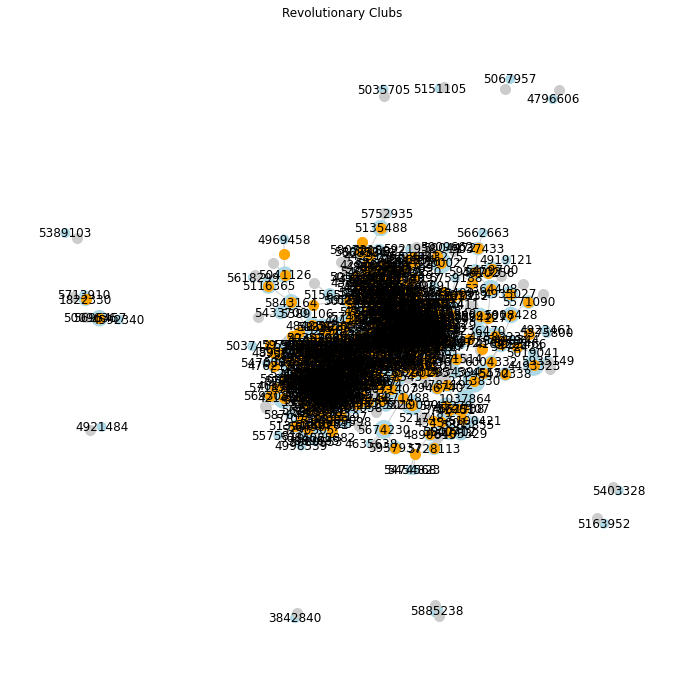

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='name', target='club') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
club_size = [g.degree(club) * 80 for club in clubs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=clubs, 
                       node_size=club_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=people, node_color='#cccccc', node_size=100)

# Draw POPULAR PEOPLE
popular_people = [person for person in people if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

## Final version

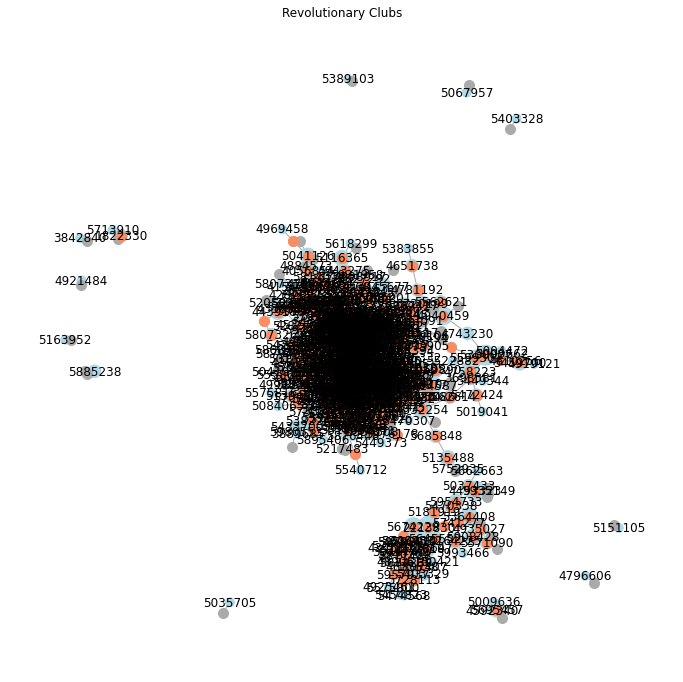

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='name', target='club') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in df.club.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df.club.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in df.name.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df.name.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()